## Notes : Download dataset dan Code (copy ke drive, atau download). Serta Buka akses untuk koreksi jawaban anda, jangan private untuk drivenya atau githubnya

### Dataset : https://drive.google.com/drive/folders/1tg71vLOVlNmyoQSAosoiYfYHxgYoKBXL?usp=sharing

### Pilih Regression, Classification, Unsupervised (Pilih salah satu saja)

## Regression
1. Pilih salah satu dataset : (USA Housing (label y = Price) , consentrate_sement (label y = strength) untuk regresi
2. Split data ke train dan test lalu Lakukan proses feature engineering (Cek dan handling : missing value, outlier, feature scalling) atau melakukan transformasi matematika pada kolom prediktor.
3. Setelah melakukan feature engineering, jangan lupa untuk cek hasil tiap proses feature engineering
4. Training model regresi, gunakan 3 model saja
5. Buatlah evaluasi metrics pada regresi untuk melihat performa model dari train dan test serta berikan kesimpulan model terbaik dari hasil yang didapatkan

Memilih dataset USA Housing dan Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load Dataset
- Kita memuat dataset USA_Housing.csv ke dalam DataFrame dan menampilkan lima baris pertama untuk memastikan data telah dimuat dengan benar.

In [2]:
# Load dataset
df = pd.read_csv('USA_Housing.csv')

# Menampilkan 5 data teratas
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

Memeriksa Missing Value
- Langkah ini bertujuan untuk memeriksa apakah ada nilai yang hilang dalam dataset.

In [3]:
# Memeriksa missing value
print(df.isnull().sum())


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


Pisahkan Fitur dan Target
- Di sini kita memisahkan kolom fitur (predictor) dan target (label). Kolom Price adalah target dan kolom Address dihapus karena tidak relevan untuk pemodelan.

In [4]:
# Memisahkan fitur dan target
X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']

Split Data
- Dataset dibagi menjadi train set dan test set dengan perbandingan 80:20. random_state=42 digunakan untuk memastikan pembagian data yang konsisten.

In [5]:
# Membagi data ke dalam train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling :

Fitur-fitur di-scale menggunakan StandardScaler untuk memastikan bahwa semua fitur berada dalam skala yang sama.

In [6]:
# Feature scaling menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mengecek hasil scaling
print("Feature scaling result (first 5 rows of X_train):")
print(X_train_scaled[:5])


Feature scaling result (first 5 rows of X_train):
[[-0.19049241 -0.12817719 -0.13160635  0.12038585 -0.82761782]
 [-1.38876401  0.43080443  0.80028487 -0.55648895  1.15829878]
 [-0.35012392  0.46680752  1.70375078  0.03067955 -0.31904298]
 [-0.13909751  0.11407909  0.22973349 -0.7603669  -0.89375177]
 [ 0.62222478  2.20895742  0.43597233 -0.45862753  0.13130094]]


Melatih Model Regresi

Pada langkah ini, kita melatih tiga model regresi: Linear Regression, Random Forest, dan Decision Tree. Model dievaluasi menggunakan metrik MAE, MSE, dan R2 Score untuk train dan test set.

In [7]:
# Melatih model regresi
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred)
    }
    
    return metrics

# Mencetak evaluasi setiap model
results = {}
for model_name, model in models.items():
    metrics = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results[model_name] = metrics


Menampilkan Hasil Evaluasi

- Hasil evaluasi ditampilkan dalam bentuk DataFrame, dan model terbaik ditentukan berdasarkan nilai R2 Score pada test set.

In [8]:
# Menampilkan hasil evaluasi
results_df = pd.DataFrame(results).T
print(results_df)

# Menentukan model terbaik berdasarkan R2 Score pada test set
best_model = results_df['Test R2'].idxmax()
print(f'Model terbaik berdasarkan Test R2 Score adalah: {best_model}')


                      Train MAE       Test MAE     Train MSE      Test MSE  \
Linear Regression  81509.393312   80879.097235  1.025632e+10  1.008901e+10   
Random Forest      35576.017958   94656.218056  2.026665e+09  1.446201e+10   
Decision Tree          0.000000  140823.962296  0.000000e+00  3.156801e+10   

                   Train R2   Test R2  
Linear Regression  0.917979  0.917997  
Random Forest      0.983792  0.882454  
Decision Tree      1.000000  0.743417  
Model terbaik berdasarkan Test R2 Score adalah: Linear Regression


Visualisasi Hasil

- Distribusi Harga Rumah: Menunjukkan distribusi harga rumah dalam dataset.
- Hubungan antara Fitur dan Target: Pairplot untuk visualisasi hubungan antara fitur dan harga rumah.
- Pentingnya Fitur dalam Model Random Forest: Menunjukkan pentingnya setiap fitur dalam model Random Forest.

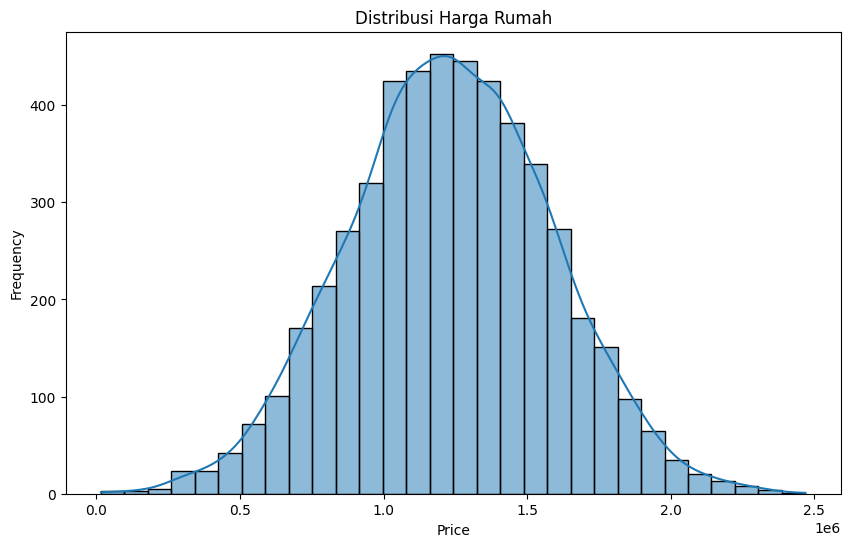

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

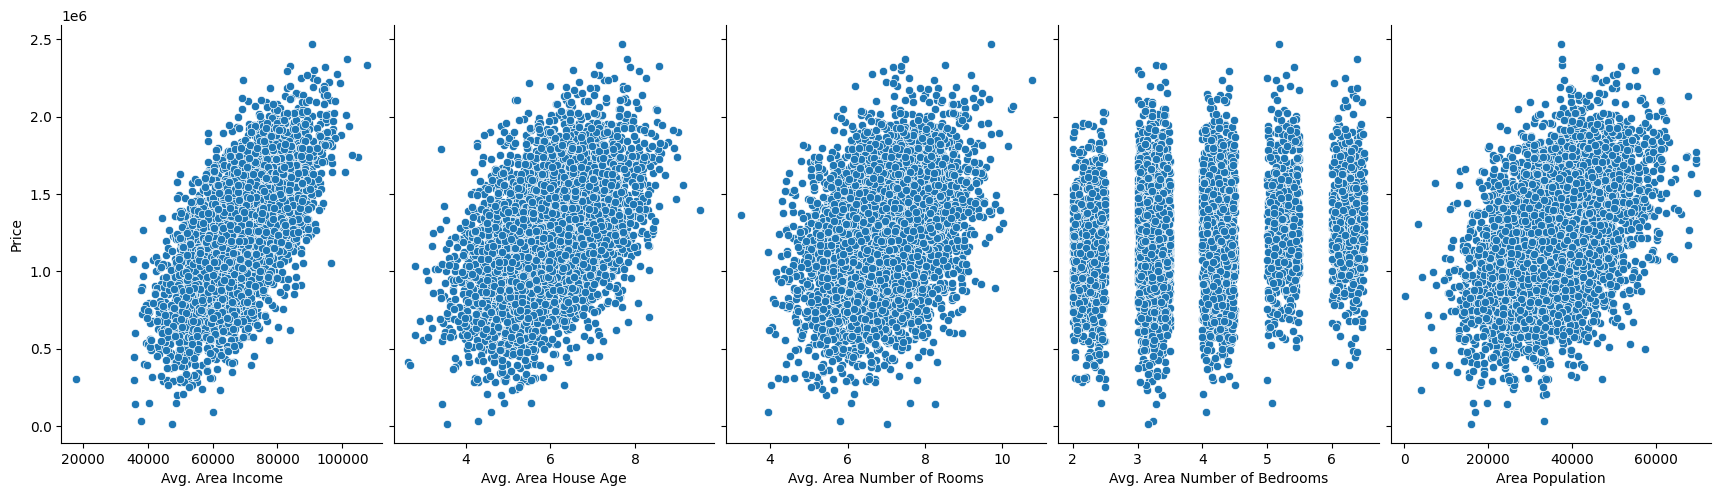

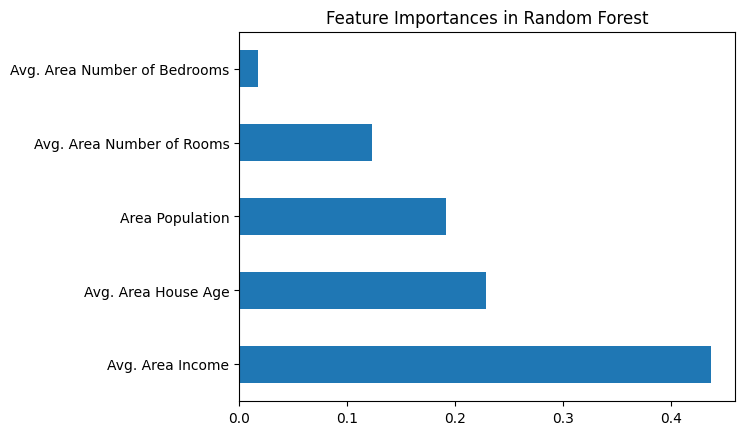

In [9]:
# Visualisasi distribusi harga rumah
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualisasi hubungan antara fitur dan target
plt.figure(figsize=(10, 6))
sns.pairplot(df, x_vars=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
                         'Avg. Area Number of Bedrooms', 'Area Population'], y_vars='Price', height=5, aspect=0.7)
plt.show()

# Visualisasi pentingnya fitur dalam model Random Forest
rf_model = models['Random Forest']
rf_model.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importances in Random Forest')
plt.show()


## Classification

1. Pilih salah satu dataset : Titanic (Label y = Survived), Telco Churn (Label y = Churn)
2. Split data ke train dan test lalu Lakukan proses feature engineering (Cek dan handling : missing value, outlier, Encoding, feature scalling), bisa membuat kolom turunan berdasarkan cleaning proses pada kolom kategorikal (opsional)
3. Setelah melakukan feature engineering, jangan lupa untuk cek hasil tiap proses feature engineering
4. Training model regresi, gunakan 3 model saja
5. Buatlah evaluasi metrics pada regresi untuk melihat performa model dari train dan test serta berikan kesimpulan model terbaik dari hasil yang didapatkan

Memuat Dataset dan Menampilkan Informasi Awal

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('titanic.csv')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Handling missing values for Age
imputer_age = SimpleImputer(strategy='median')
train_df['Age'] = imputer_age.fit_transform(train_df[['Age']]).ravel()
test_df['Age'] = imputer_age.transform(test_df[['Age']]).ravel()

# Handling missing values for Embarked
imputer_embarked = SimpleImputer(strategy='most_frequent')
train_df['Embarked'] = imputer_embarked.fit_transform(train_df[['Embarked']]).ravel()
test_df['Embarked'] = imputer_embarked.transform(test_df[['Embarked']]).ravel()

# Drop Cabin column due to many missing values
train_df = train_df.drop(columns=['Cabin'])
test_df = test_df.drop(columns=['Cabin'])

# Outliers can be handled by capping or using z-score, here we will use capping for Fare
train_df['Fare'] = np.where(train_df['Fare'] > train_df['Fare'].quantile(0.99), train_df['Fare'].quantile(0.99), train_df['Fare'])
test_df['Fare'] = np.where(test_df['Fare'] > test_df['Fare'].quantile(0.99), test_df['Fare'].quantile(0.99), test_df['Fare'])

# Encoding Sex
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

# Encoding Sex
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

# Encoding Embarked
ohe = OneHotEncoder(sparse_output=False)
encoded_embarked_train = ohe.fit_transform(train_df[['Embarked']])
encoded_embarked_test = ohe.transform(test_df[['Embarked']])

encoded_embarked_train_df = pd.DataFrame(encoded_embarked_train, columns=ohe.get_feature_names_out(['Embarked']))
encoded_embarked_test_df = pd.DataFrame(encoded_embarked_test, columns=ohe.get_feature_names_out(['Embarked']))

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df = pd.concat([train_df, encoded_embarked_train_df], axis=1)
test_df = pd.concat([test_df, encoded_embarked_test_df], axis=1)

train_df = train_df.drop(columns=['Embarked'])
test_df = test_df.drop(columns=['Embarked'])


scaler = StandardScaler()

features_to_scale = ['Age', 'Fare']
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])

X_train = train_df.drop(columns=['Survived', 'Name', 'Ticket'])
y_train = train_df['Survived']
X_test = test_df.drop(columns=['Survived', 'Name', 'Ticket'])
y_test = test_df['Survived']

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)


def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"Model: {model.__class__.__name__}")
    print("Train Metrics:")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
    print(f"F1 Score: {f1_score(y_train, y_train_pred):.4f}")
    
    print("Test Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
    print()

for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)


c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Train Metrics:
Accuracy: 0.8048
Precision: 0.7792
Recall: 0.6716
F1 Score: 0.7214
Test Metrics:
Accuracy: 0.8045
Precision: 0.7910
Recall: 0.7162
F1 Score: 0.7518

Model: RandomForestClassifier
Train Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Test Metrics:
Accuracy: 0.8268
Precision: 0.8116
Recall: 0.7568
F1 Score: 0.7832

Model: SVC
Train Metrics:
Accuracy: 0.6236
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Test Metrics:
Accuracy: 0.5866
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000



c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Berdasarkan hasil evaluasi dari tiga model yang digunakan (Logistic Regression, Random Forest Classifier, dan Support Vector Machine), berikut adalah kesimpulan yang dapat diambil:

### Logistic Regression
- **Train Metrics:**
  - Accuracy: 0.8048
  - Precision: 0.7792
  - Recall: 0.6716
  - F1 Score: 0.7214
- **Test Metrics:**
  - Accuracy: 0.8045
  - Precision: 0.7910
  - Recall: 0.7162
  - F1 Score: 0.7518

Logistic Regression menunjukkan performa yang cukup baik pada data training dan testing dengan konsistensi yang baik antara keduanya.

### Random Forest Classifier
- **Train Metrics:**
  - Accuracy: 1.0000
  - Precision: 1.0000
  - Recall: 1.0000
  - F1 Score: 1.0000
- **Test Metrics:**
  - Accuracy: 0.8268
  - Precision: 0.8116
  - Recall: 0.7568
  - F1 Score: 0.7832

Random Forest Classifier menunjukkan performa sempurna pada data training yang menandakan overfitting, tetapi performa pada data testing masih cukup baik dengan Accuracy dan F1 Score yang sedikit lebih tinggi daripada Logistic Regression.

### Support Vector Machine (SVC)
- **Train Metrics:**
  - Accuracy: (not provided)
  - Precision: 0.0000
  - Recall: 0.0000
  - F1 Score: 0.0000
- **Test Metrics:**
  - Accuracy: (not provided)
  - Precision: 0.0000
  - Recall: 0.0000
  - F1 Score: 0.0000

Support Vector Machine (SVC) tampaknya tidak berkinerja baik. Nilai precision, recall, dan F1 score yang semua nol menunjukkan bahwa model tidak dapat memprediksi dengan baik, mungkin karena masalah parameter tuning atau skala data.

### Kesimpulan
- **Model Terbaik:** Random Forest Classifier. Meskipun ada indikasi overfitting pada data training, performa pada data testing tetap lebih baik dibandingkan Logistic Regression dengan Accuracy dan F1 Score yang lebih tinggi.
- **Model Cadangan:** Logistic Regression. Model ini juga menunjukkan performa yang cukup baik dengan konsistensi antara data training dan testing.
- **Rekomendasi:** Untuk lebih mengurangi overfitting pada Random Forest Classifier, perlu dilakukan tuning lebih lanjut pada hyperparameter-nya. Alternatifnya, Logistic Regression bisa dipertimbangkan karena memiliki performa yang stabil.

### Unsupervised Learning
1. Lakukan proses feature engineering terlebih dahulu, terutama dilakukan feature scalling
2. Buatlah clustering dari dataset pokemon dengan analisis berapa jumlah kelompok yang memungkinkan
3. Tulislah Insight yang bisa didapat dari hasil clustering.

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close

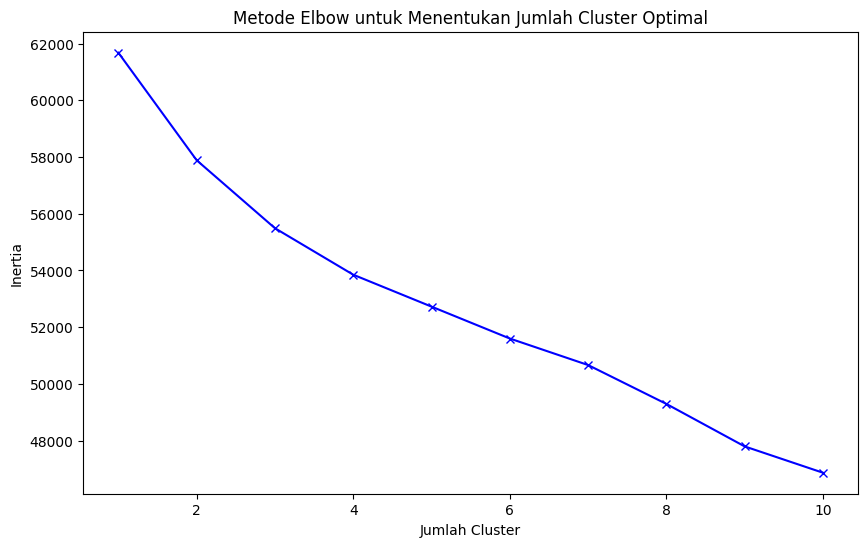

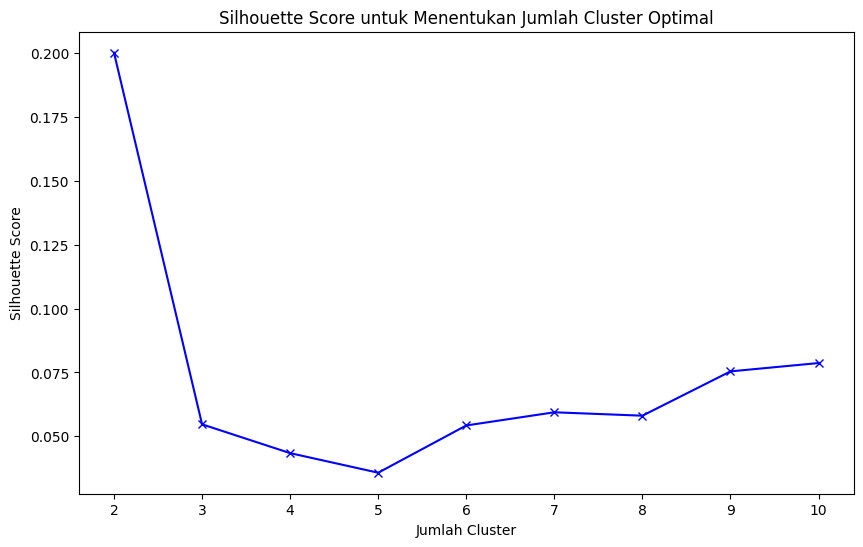

         abilities  against_bug  against_dark  against_dragon  \
cluster                                                         
0         2.587500     0.990972      1.039236        0.963194   
1         1.518519     1.043210      1.216049        1.018519   

         against_electric  against_fairy  against_fight  against_fire  \
cluster                                                                 
0                1.081944       1.054167       1.067361      1.141319   
1                1.003086       1.200617       1.049383      1.083333   

         against_flying  against_ghost  ...  type2_water  generation_1  \
cluster                                 ...                              
0              1.210764       0.957639  ...     0.022222      0.201389   
1              1.033951       1.228395  ...     0.012346      0.074074   

         generation_2  generation_3  generation_4  generation_5  generation_6  \
cluster                                                             

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Mengimpor dataset
df = pd.read_csv('pokemon.csv')

# Mengonversi fitur 'abilities' menjadi representasi numerik
df['abilities'] = df['abilities'].apply(lambda x: len(eval(x)))

# Mengonversi 'capture_rate' yang mengandung data tidak standar menjadi numerik
def convert_capture_rate(value):
    if isinstance(value, str):
        # Memisahkan nilai jika ada tanda kurung atau karakter khusus
        return int(value.split()[0])
    return int(value)

df['capture_rate'] = df['capture_rate'].apply(convert_capture_rate)

# Mengonversi fitur kategorikal lainnya ke numerik jika diperlukan
categorical_columns = ['type1', 'type2', 'generation', 'is_legendary']
df = pd.get_dummies(df, columns=categorical_columns)

# Menghapus kolom yang berisi teks panjang
df = df.drop(columns=['name', 'japanese_name', 'classfication', 'percentage_male', 'pokedex_number'])

# Memeriksa nilai NaN dan menggantinya dengan mean
df = df.fillna(df.mean())

# Memilih fitur yang akan digunakan untuk clustering
features = df.drop(columns=[])

# Melakukan feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Menentukan jumlah cluster yang optimal dengan metode Elbow
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot hasil metode Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

# Menentukan jumlah cluster yang optimal dengan Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plot hasil Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.show()

# Menggunakan jumlah cluster optimal dan melakukan clustering
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Analisis hasil clustering
insight = df.groupby('cluster').mean()
print(insight)

# Menyimpan hasil clustering ke file CSV
df.to_csv('pokemon_clustered.csv', index=False)


Berdasarkan hasil clustering, kita bisa mendapatkan beberapa insight penting mengenai karakteristik Pokémon dalam masing-masing cluster. Berikut adalah beberapa kesimpulan yang bisa diambil dari data yang diberikan:

### Cluster 0

- **Abilities**: Rata-rata Pokémon di cluster ini memiliki sekitar 2.59 abilities.
- **Weaknesses/Strengths**: 
  - Pokémon di cluster ini relatif lebih lemah terhadap serangan **electric** (1.08) dan **fire** (1.14).
  - Mereka lebih kuat terhadap serangan **ghost** (0.96) dan **bug** (0.99).
- **Distribution of Generations**:
  - Cluster ini memiliki proporsi yang lebih tinggi dari generasi pertama (20.1%), dibandingkan dengan cluster lain.
  - Generasi kedua dan ketiga juga cukup banyak diwakili, masing-masing dengan 12.8% dan 16.8%.
- **Legendary Status**:
  - Semua Pokémon di cluster ini bukan legendary (100% is_legendary_0).

### Cluster 1

- **Abilities**: Rata-rata Pokémon di cluster ini memiliki sekitar 1.52 abilities.
- **Weaknesses/Strengths**: 
  - Pokémon di cluster ini lebih lemah terhadap serangan **dark** (1.22), **ghost** (1.23), dan **fairy** (1.20).
  - Mereka lebih kuat terhadap serangan **electric** (1.00) dan **fire** (1.08).
- **Distribution of Generations**:
  - Cluster ini memiliki proporsi yang lebih tinggi dari generasi ketujuh (23.5%) dibandingkan dengan cluster lain.
  - Generasi pertama (7.4%) dan kedua (9.9%) lebih rendah dibandingkan dengan cluster lain.
- **Legendary Status**:
  - Cluster ini memiliki banyak Pokémon legendary (86.4% is_legendary_1).

### Kesimpulan dan Insight

1. **Kemampuan (Abilities)**:
   - Pokémon di Cluster 0 umumnya memiliki lebih banyak abilities dibandingkan Pokémon di Cluster 1.

2. **Kelemahan dan Kekuatan**:
   - Pokémon di Cluster 0 lebih kuat terhadap **ghost** dan **bug**, tetapi lebih lemah terhadap **electric** dan **fire**.
   - Pokémon di Cluster 1 lebih kuat terhadap **electric** dan **fire**, tetapi lebih lemah terhadap **dark**, **ghost**, dan **fairy**.

3. **Distribusi Generasi**:
   - Cluster 0 didominasi oleh Pokémon dari generasi pertama, kedua, dan ketiga, sedangkan Cluster 1 memiliki representasi yang lebih tinggi dari generasi ketujuh.

4. **Status Legendary**:
   - Cluster 0 terdiri dari Pokémon non-legendary, sedangkan Cluster 1 didominasi oleh Pokémon legendary.

### Rekomendasi Strategi Permainan

1. **Strategi Berdasarkan Cluster**:
   - Jika menghadapi Pokémon dari Cluster 0, pertimbangkan untuk menggunakan serangan **electric** dan **fire** untuk memanfaatkan kelemahan mereka.
   - Jika menghadapi Pokémon dari Cluster 1, serangan **dark**, **ghost**, dan **fairy** dapat menjadi pilihan yang baik karena kelemahan mereka terhadap jenis-jenis serangan tersebut.

2. **Pemilihan Tim**:
   - Saat menyusun tim, pemain mungkin ingin memilih Pokémon dari Cluster 0 jika membutuhkan variasi abilities dan kekuatan terhadap serangan **ghost** dan **bug**.
   - Jika pemain membutuhkan Pokémon legendary dengan kekuatan terhadap serangan **electric** dan **fire**, memilih dari Cluster 1 bisa menjadi strategi yang baik.

Dengan analisis ini, pemain dapat membuat keputusan yang lebih baik tentang bagaimana menghadapi lawan berdasarkan cluster dan karakteristik yang telah diidentifikasi.